In [9]:
#Loading Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

In [10]:
# Reading Agriculture Dataset
Train=pd.read_csv("train_agriculture.csv")
Train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [11]:
Test=pd.read_csv("test_agriculture.csv")
Test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


# Data Description

In [12]:
# 1) ID  :- Unique Id
# 2) Estimated_Insects_Count :- Estimated insect count per square meter
# 3) Crop type :- category of crop (0 ,1)
# 4) Soil type :- category of soil (0,1)
# 5) Pesticide_used_category :- Type of pesticides used ( 1- Never ,2- previously used , 3 -Currently using )
# 6) Number_Doses_Week :- No of doses per week
# 7) Number_Weeks_Used :- Number of weeks used 
# 8) Number_Weeks_Quit :- Number of weeks quit
# 9) Season :- Season category (1,2,3)
# 10) Crop_Damage :- Crop damage category ( 0= alive , 1= Damage due to other causes ,2 = Damage due to pesticides)

In [13]:
Train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


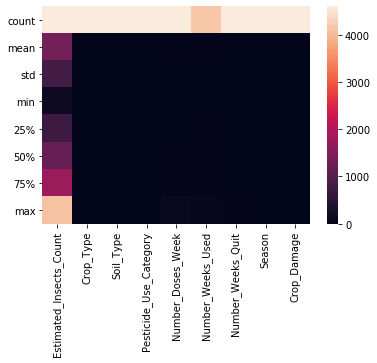

In [14]:
# Making heatmap of describe.
sns.heatmap(Train.describe())

In [15]:
# Train Database columns 
Train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [16]:
# Test Database Columns 
Test.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [17]:
# Shape of Test and Train Database 
print("Train Database shape :",Train.shape)
print("\n")
print("Test Database shape :",Test.shape)
print("\n")

Train Database shape : (4599, 10)


Test Database shape : (1199, 9)




In [18]:
#Finding Null values in database
print(Train.isnull().sum())
print("\n")
print(Test.isnull().sum())
print("\n")

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64


ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64




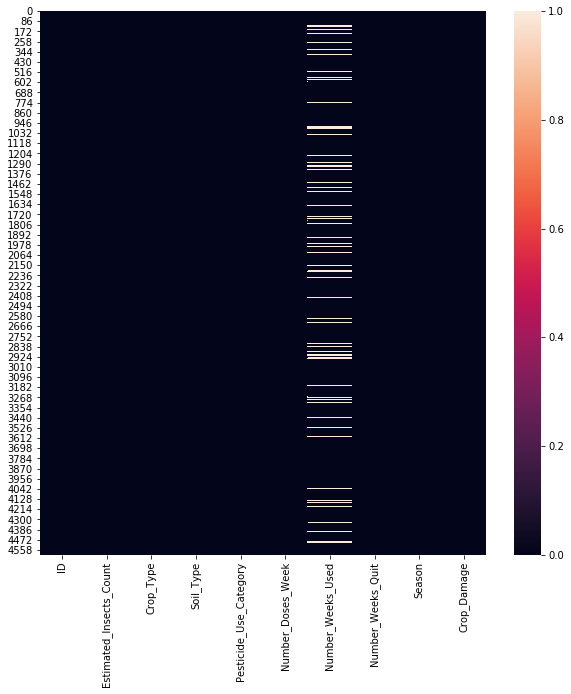

In [19]:
#Making Heatmap of Null values
plt.figure(figsize=(10,10))
sns.heatmap(Train.isnull())

In [20]:
#Finding Correlation of the variables
Train.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.449470,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002237,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.098399,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.387982,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.104022,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.449470,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467386,-0.011108,0.244988
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.467386,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.011108,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.244988,-0.152918,-0.016196,1.000000


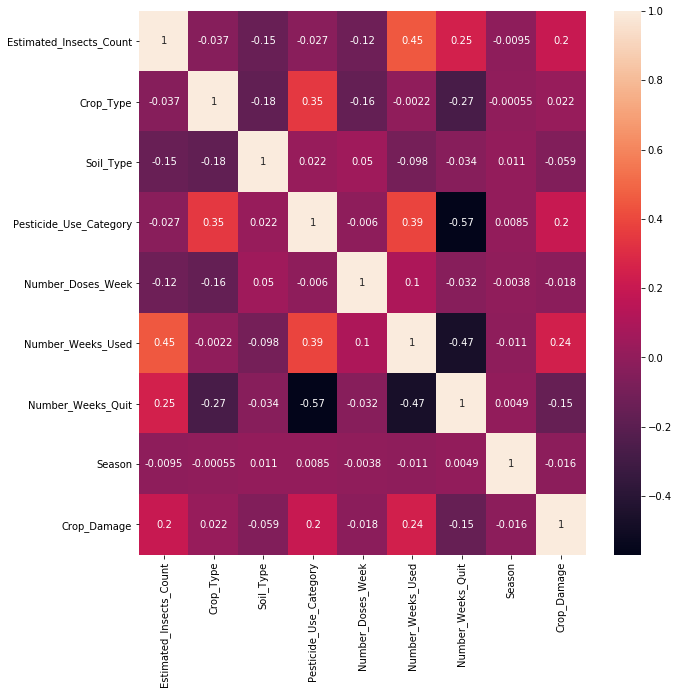

In [21]:
# Making Heatmap of correlation
plt.figure(figsize=(10,10))
sns.heatmap(Train.corr(),annot=True)

# Data Visualization

# Bivariate Analysis

Text(0.5, 1.0, '   No of doses of pesticides used  per week')

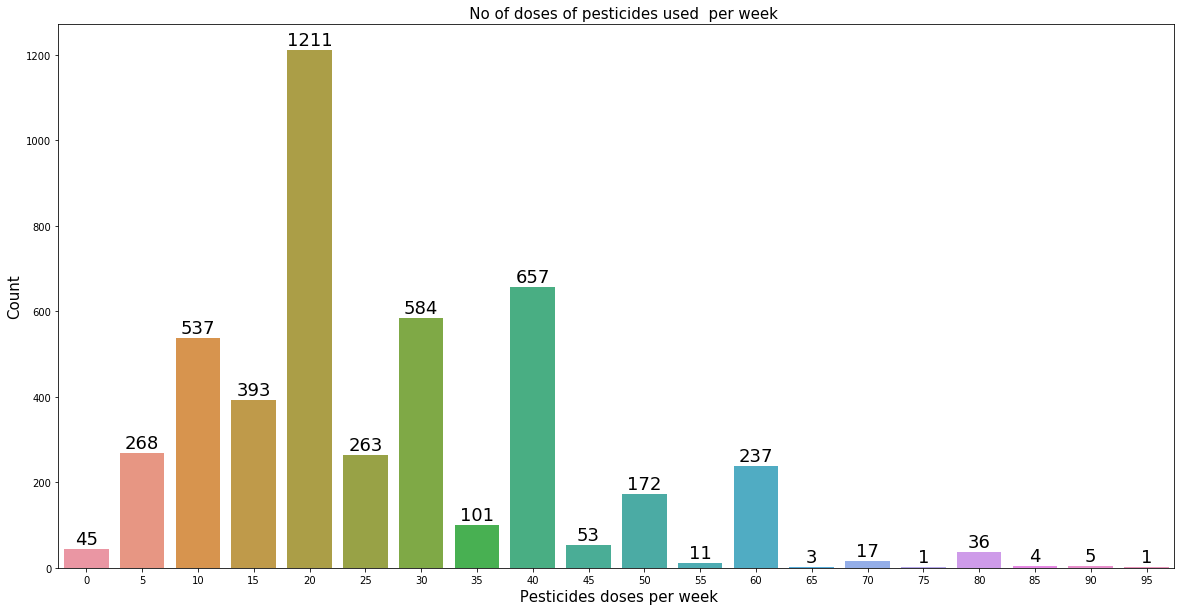

In [15]:
# Countplot of No of doses of pesticides used per week.
plt.figure(figsize=(20,10))
pd =sns.countplot(x = "Number_Doses_Week", data=Train)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xlabel(" Pesticides doses per week", size=15)
plt.ylabel("Count" ,size=15)
plt.title ("   No of doses of pesticides used  per week" , size=15)
#conclusion:- 20 doses of pesticides used  per week has maximum count.

Text(0, 0.5, 'Count')

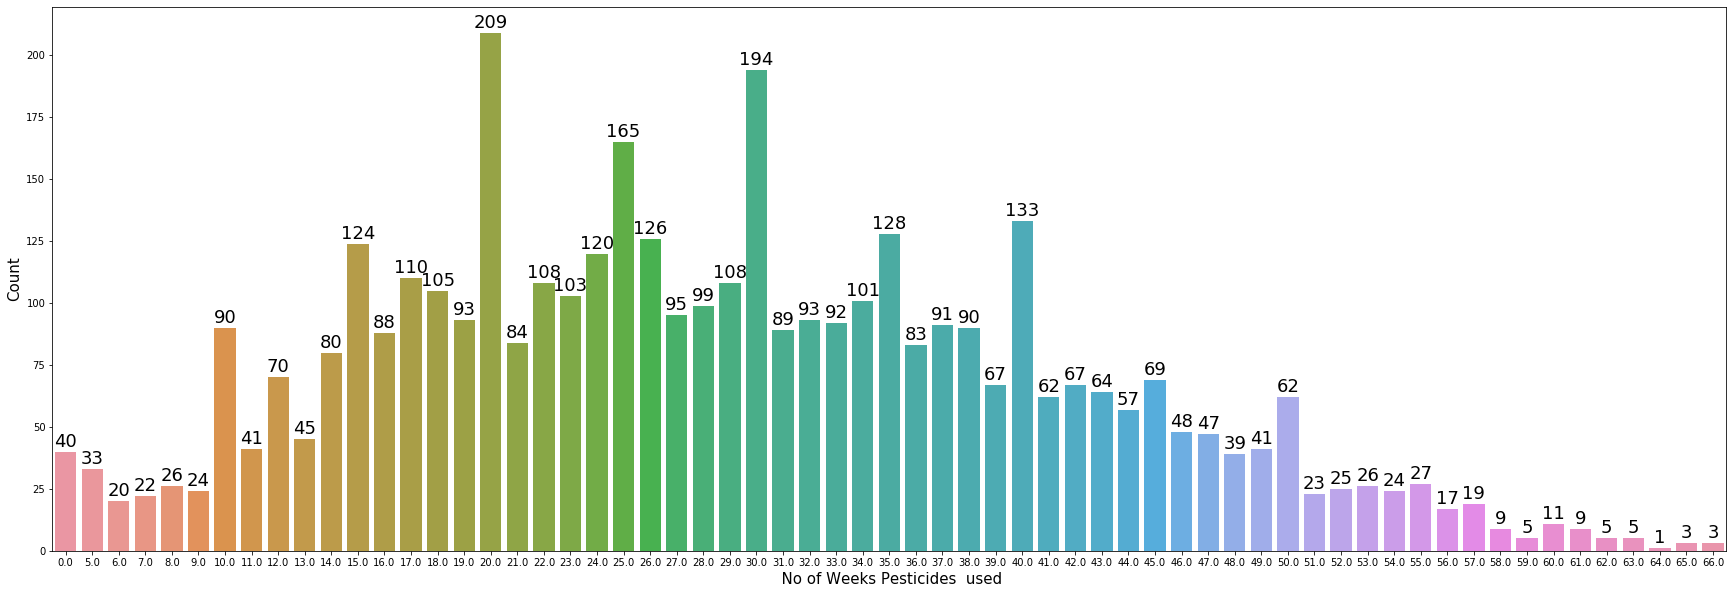

In [16]:
# Countplot of no of weeks pesticides used.
plt.figure(figsize=(30,10))
pd =sns.countplot(x = "Number_Weeks_Used", data=Train)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xlabel("  No of Weeks Pesticides  used ", size=15)
plt.ylabel("Count" ,size=15)
#Conclusion:- Pesticides used for  20 weeks has maximum  count.

Text(0.5, 1.0, 'Types of Crops Harvested')

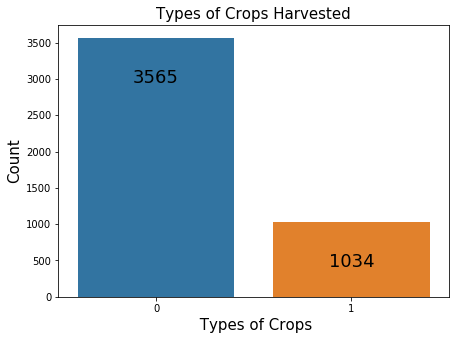

In [17]:
# Countplot of different crop harvested.
plt.figure(figsize=(7,5))
pd =sns.countplot(x = "Crop_Type" , data=Train)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0,-40), 
                   textcoords = 'offset points')
plt.xlabel(" Types of Crops", size=15)
plt.ylabel("Count" ,size=15)
plt.title("Types of Crops Harvested" ,size=15)
# Conclusion :- 0 category of crop has been  harvested the most.

Text(0, 0.5, 'Count')

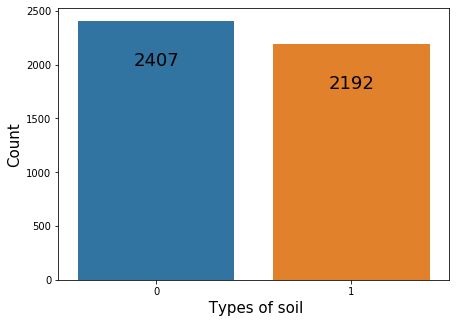

In [18]:
# Countplot of the type of soil used for harvesting crops.
plt.figure(figsize=(7,5))
pd =sns.countplot(x = "Soil_Type" , data=Train)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0,-40), 
                   textcoords = 'offset points')
plt.xlabel(" Types of soil", size=15)
plt.ylabel("Count" ,size=15)
#conclusion :- category 0 type of soil has been  used the  most.

Text(0, 0.5, 'Count')

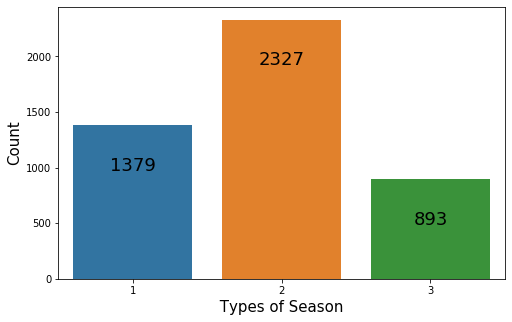

In [19]:

plt.figure(figsize=(8,5))
pd =sns.countplot(x = "Season" , data=Train)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0,-40), 
                   textcoords = 'offset points')
plt.xlabel(" Types of Season ", size=15)
plt.ylabel("Count" ,size=15)
#Conclusion:- Crop harvested in season 2 has maximum count.

Text(0.5, 1.0, '  Category of pesticides used')

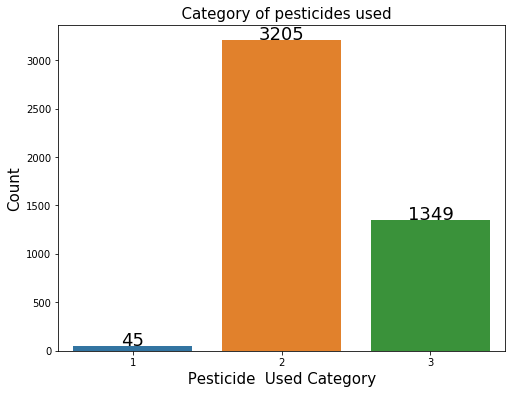

In [20]:
#Countplot of catgory of pesticides used.
plt.figure(figsize=(8,6))
pd =sns.countplot(x = "Pesticide_Use_Category" , data=Train)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0,6), 
                   textcoords = 'offset points')
plt.xlabel(" Pesticide  Used Category ", size=15)
plt.ylabel("Count" ,size=15)
plt.title ("  Category of pesticides used" , size=15)
# conclusion :- Category 2 type of pesticide has been used mostly.

Text(0.5, 1.0, ' Types of Crops Harvested On Different Soil ')

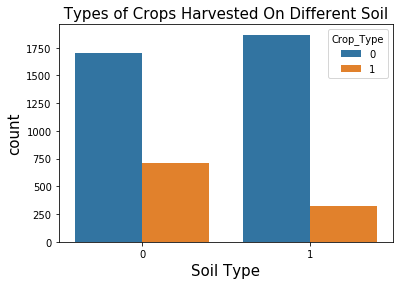

In [21]:
# Countplot of types of Crops harvested on Differnt soil
sns.countplot(x="Soil_Type" , data=Train , hue ="Crop_Type")
plt.xlabel("Soil Type", size=15)
plt.ylabel("count" ,size=15)
plt.title (" Types of Crops Harvested On Different Soil " , size=15)
#Conclusion:- Crop of 1 type has been harested mostly on 0 category of soil and 0 category crop  has been harvested mostly on 1 type of soil.

Text(0.5, 1.0, ' Crop damage on different soil  where 0-alive ,1-Damage due to other causes ,2 -Damage due to pesticides')

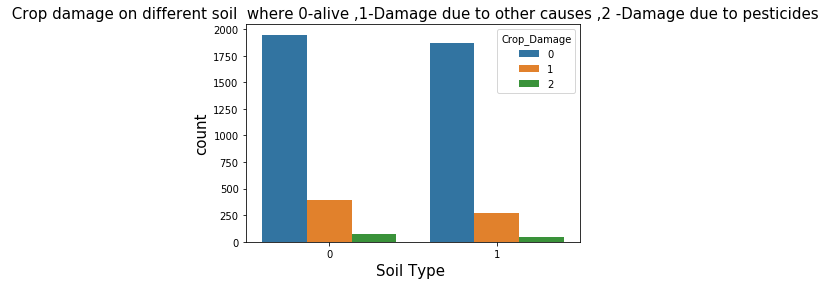

In [22]:
sns.countplot(x=   "Soil_Type"   , data=Train , hue ="Crop_Damage")
plt.xlabel("Soil Type ", size=15)
plt.ylabel("count" ,size=15)
plt.title (" Crop damage on different soil  where 0-alive ,1-Damage due to other causes ,2 -Damage due to pesticides"   , size=15)

Text(0.5, 1.0, ' In different seasons types of soil used ')

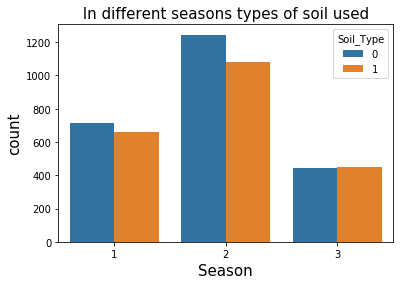

In [23]:
# Countplot of types of soil used in differnt seasons.
sns.countplot(x="Season" , data=Train , hue ="Soil_Type")
plt.xlabel("Season", size=15)
plt.ylabel("count" ,size=15)
plt.title (" In different seasons types of soil used " , size=15)


Text(0.5, 1.0, ' Types of pesticides used on different soil  ')

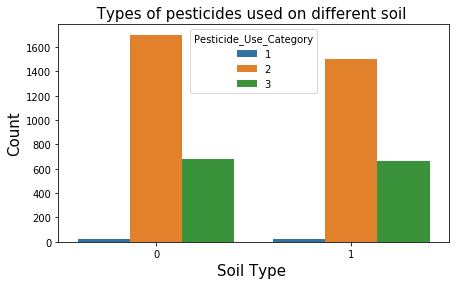

In [24]:
# Countplot of types of pesticides used on different soils.
plt.figure(figsize=(7,4))
sns.countplot(x="Soil_Type" , data=Train , hue ="Pesticide_Use_Category")
plt.xlabel("Soil Type ", size=15)
plt.ylabel("Count" ,size=15)
plt.title (" Types of pesticides used on different soil  " , size=15)
#conclusion :- 2 category of pesticide has been  used mostly .

# Multivariate analysis

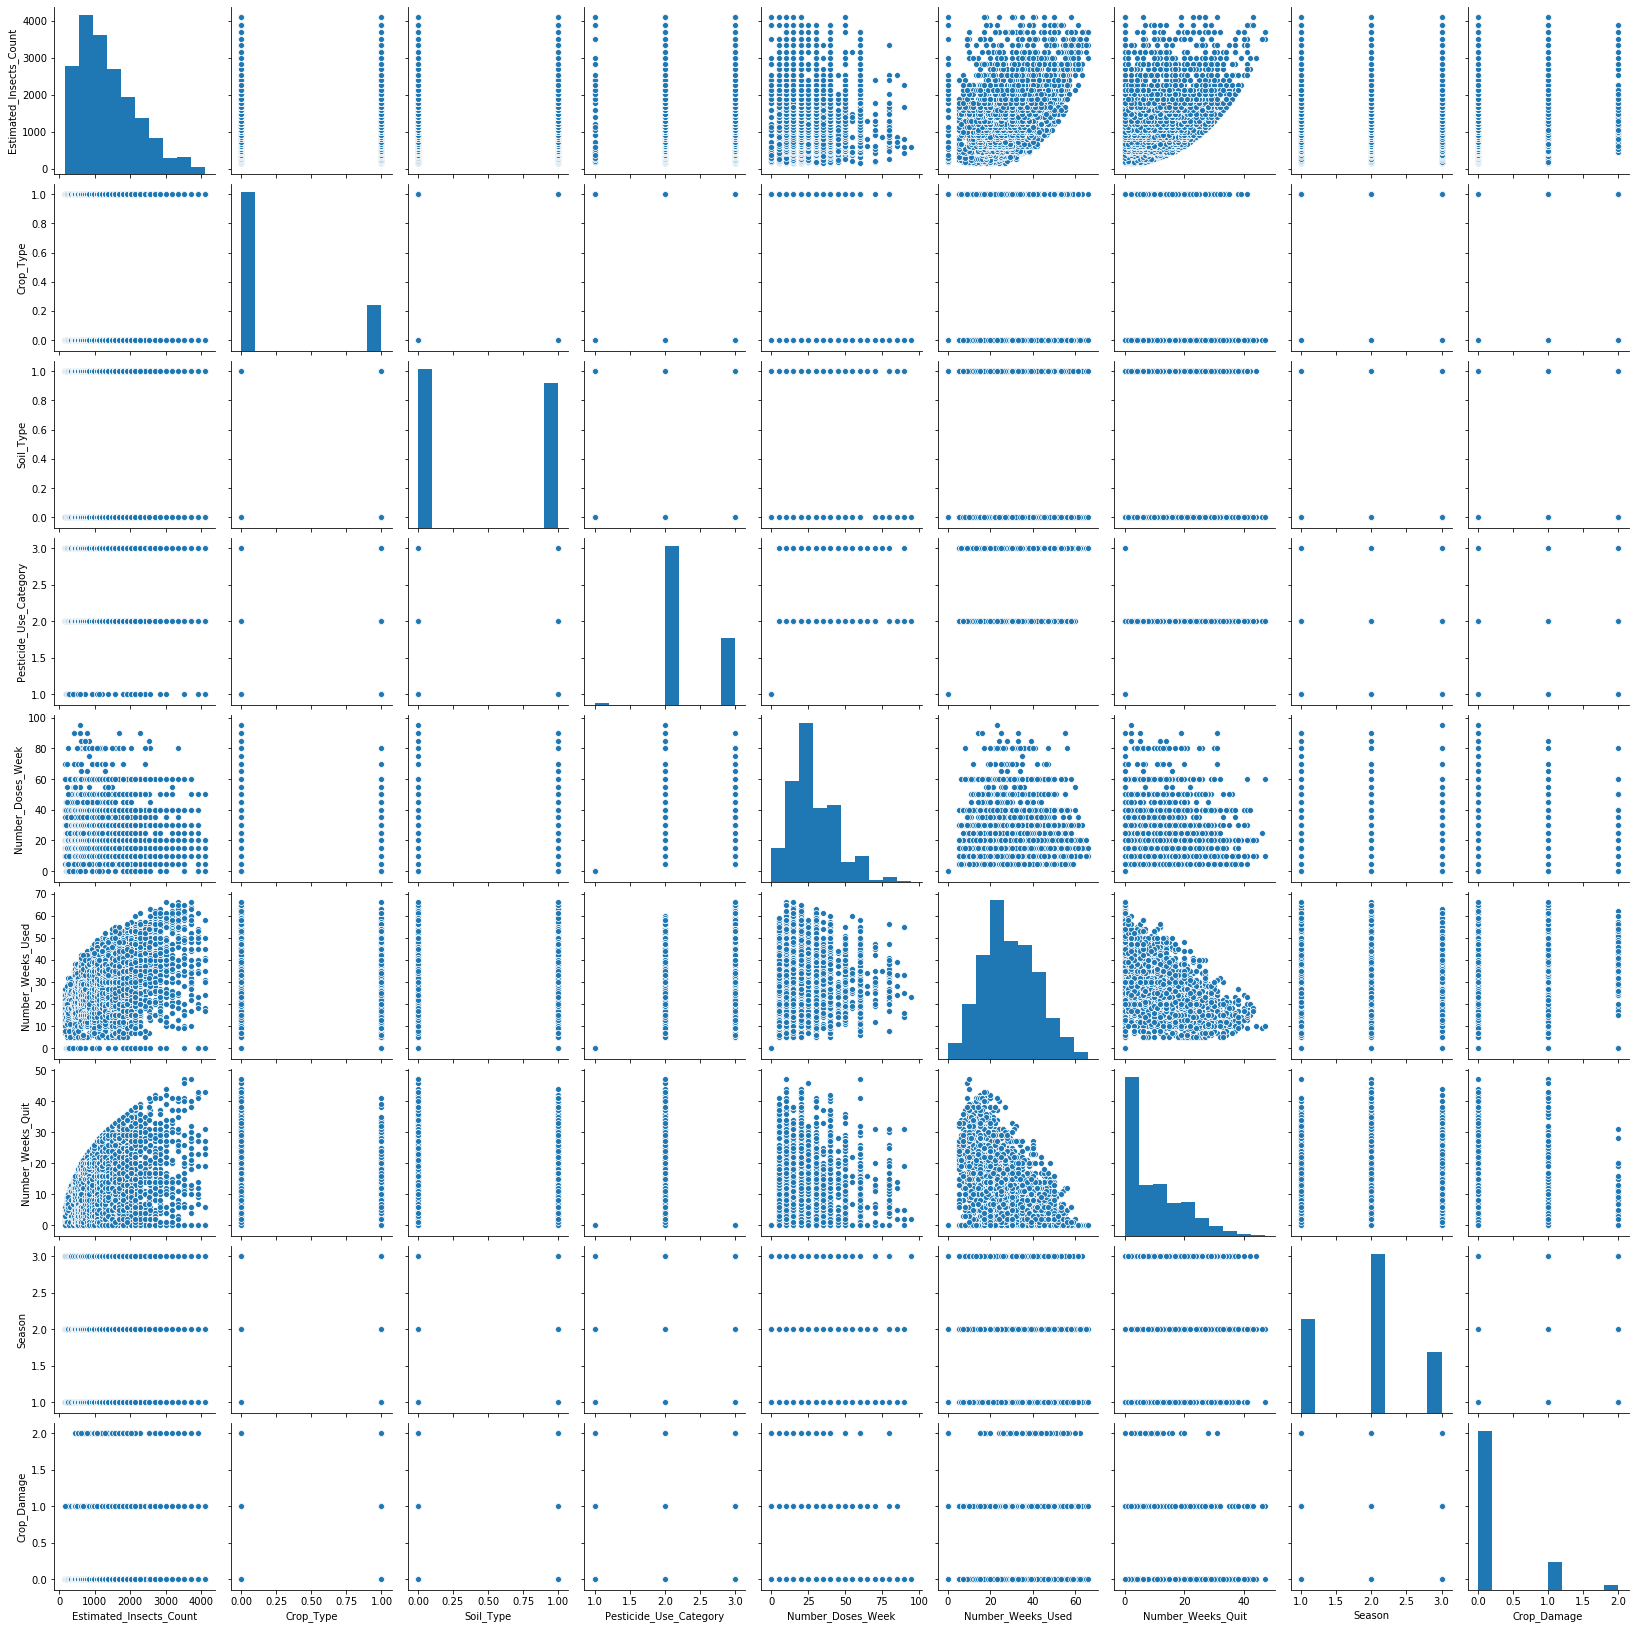

In [25]:
#Making pairplot
sns.pairplot(Train)

Estimated_Insects_Count       AxesSubplot(0.125,0.787927;0.133621x0.0920732)
Crop_Type                  AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
Soil_Type                   AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
Pesticide_Use_Category     AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
Number_Doses_Week          AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
Number_Weeks_Used             AxesSubplot(0.125,0.677439;0.133621x0.0920732)
Number_Weeks_Quit          AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
Season                      AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
Crop_Damage                AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
dtype: object

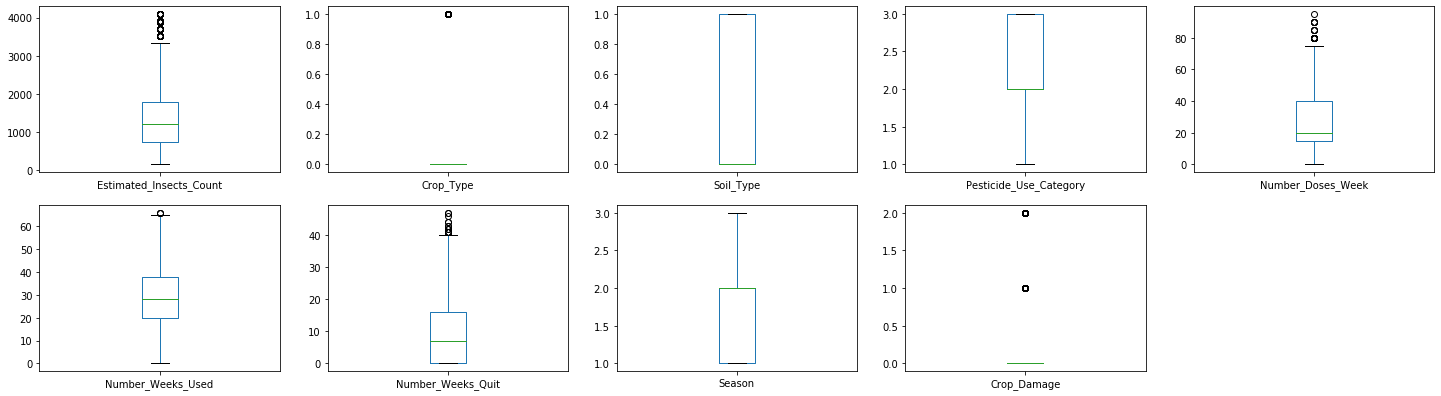

In [26]:
# Making Boxplot of all variables
Train.plot(kind='box',subplots=True,layout=(7,5),figsize=(25,25))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECA7925588>,
      dtype=object)

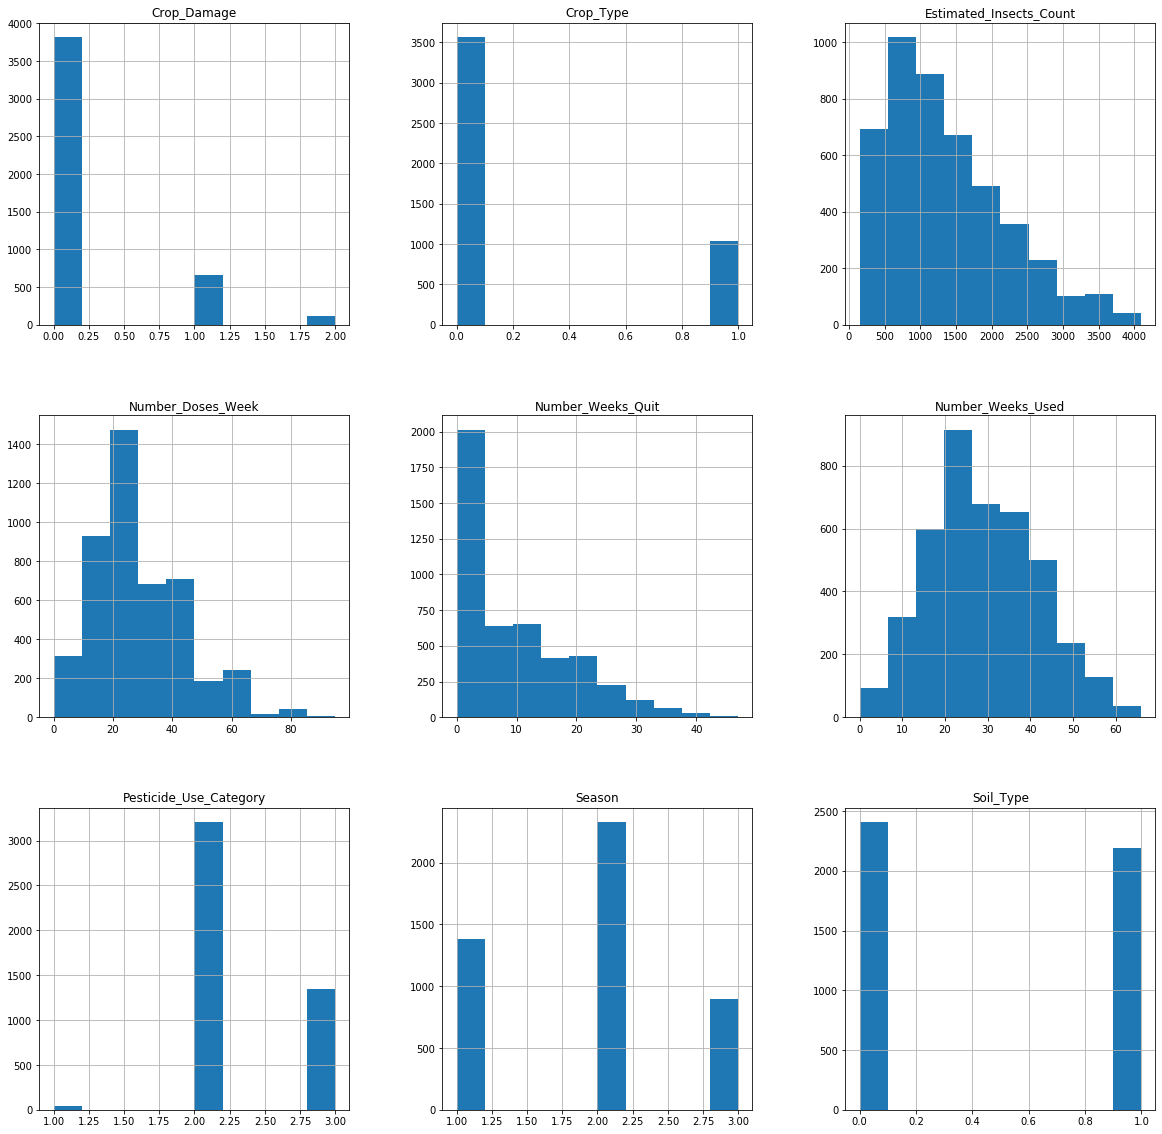

In [27]:
# Making Histrogram of all variables
Train.hist(figsize=(20,20))

{'bodies': [<matplotlib.collections.PolyCollection at 0x1eca7e5cb48>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1eca7e58f48>,
 'cmins': <matplotlib.collections.LineCollection at 0x1eca7e60c88>,
 'cbars': <matplotlib.collections.LineCollection at 0x1eca7e60c08>}

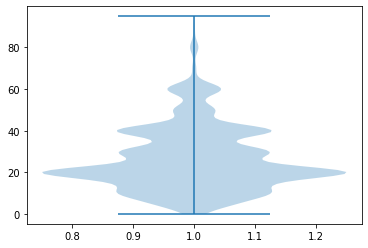

In [28]:
#Making voilinplot of Number_Doses_Week
plt.violinplot(Train["Number_Doses_Week"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1eca7eb2a08>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1eca7ea8e08>,
 'cmins': <matplotlib.collections.LineCollection at 0x1eca7ebab88>,
 'cbars': <matplotlib.collections.LineCollection at 0x1eca7eb2d48>}

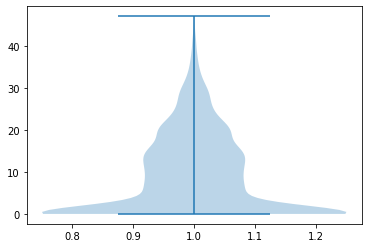

In [29]:
#Making voilinplot of Number_Weeks_Quit
plt.violinplot(Train["Number_Weeks_Quit"])

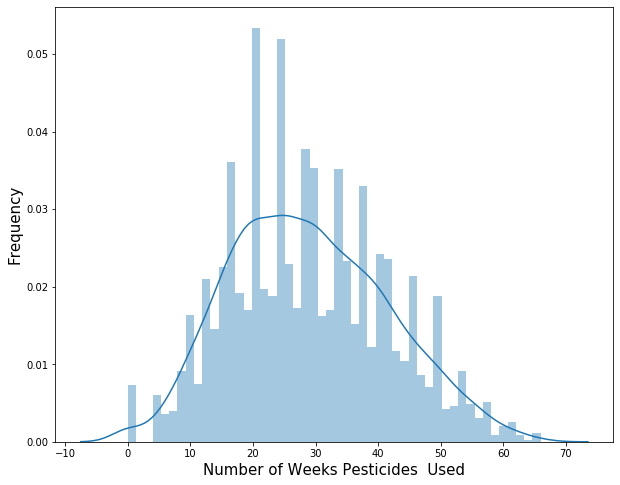

In [30]:
# Making Distribution plot of Number of Weeks Pesticides  Used

plt.figure(figsize=(10,8))
sns.distplot(Train["Number_Weeks_Used"], bins=50  )
plt.xlabel("Number of Weeks Pesticides  Used", Size=15 )
plt.ylabel("Frequency" , Size=15)
plt.show()

In [22]:
# Droping Null values in Train dataset
Train=Train.dropna(axis=0)   

In [23]:
# Droping Null values in Test Dataset
Test=Test.dropna(axis=0)

In [24]:
# Shape of Train and Test datset
print(Train.shape)
print("")
print(Test.shape)

(4157, 10)

(1080, 9)


In [25]:
# droping ID column from Train dataset
Train= Train.drop(["ID"],axis = 1)

In [26]:
# droping ID column from Test dataset
Test= Test.drop(["ID"],axis = 1)

In [27]:
# Calculating Zscore 
from scipy.stats import zscore
z=np.abs(zscore(Train))
z

array([[1.44739987, 1.85377978, 0.95184369, ..., 0.95293986, 1.28007374,
        0.42306851],
       [1.42164731, 1.85377978, 0.95184369, ..., 0.95293986, 0.15500353,
        1.78634832],
       [1.3627843 , 1.85377978, 0.95184369, ..., 0.95293986, 0.15500353,
        1.78634832],
       ...,
       [1.10210394, 0.5394384 , 1.05059266, ..., 1.81560043, 0.15500353,
        0.42306851],
       [1.10210394, 0.5394384 , 1.05059266, ..., 1.50798484, 0.15500353,
        0.42306851],
       [1.10210394, 0.5394384 , 1.05059266, ..., 0.79021514, 0.15500353,
        0.42306851]])

In [28]:
from scipy.stats import zscore
z1=np.abs(zscore(Test))
z1

array([[1.0293918 , 2.04143678, 1.07103562, ..., 2.27246089, 0.79829037,
        0.17893868],
       [0.7722004 , 2.04143678, 0.93367576, ..., 2.27246089, 0.79829037,
        0.17893868],
       [0.64717681, 2.04143678, 0.93367576, ..., 2.27246089, 0.79829037,
        0.17893868],
       ...,
       [0.16970575, 0.48985108, 1.07103562, ..., 0.31569204, 0.46085256,
        1.28510509],
       [0.16970575, 0.48985108, 1.07103562, ..., 1.25494109, 1.78873282,
        1.28510509],
       [0.07444968, 0.48985108, 1.07103562, ..., 0.4670155 , 0.23589402,
        1.28510509]])

In [29]:
# Removing Outliners from Train Dataset 
Train=Train[(z<3).all(axis=1)]

In [30]:
# Removing Outliners from Test Dataset 
Test=Test[(z1<3).all(axis=1)]

# Splitting Data into target and Input

In [31]:
x=Train.iloc[:,0:-1]
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0.0,0,1
1,209,1,0,1,0,0.0,0,2
2,257,1,0,1,0,0.0,0,2
3,257,1,1,1,0,0.0,0,2
4,342,1,0,1,0,0.0,0,2
...,...,...,...,...,...,...,...,...
4593,2138,0,1,2,60,47.0,6,3
4595,2139,0,1,2,30,47.0,2,1
4596,2267,0,1,2,10,7.0,27,2
4597,2267,0,1,2,10,20.0,24,2


In [32]:
y=Train.iloc[:,-1]
y

0       0
1       1
2       1
3       1
4       1
       ..
4593    0
4595    1
4596    0
4597    0
4598    0
Name: Crop_Damage, Length: 3949, dtype: int64

In [33]:
#  Using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [34]:
x.skew()

Estimated_Insects_Count    0.794630
Crop_Type                  1.306386
Soil_Type                  0.086718
Pesticide_Use_Category     0.766209
Number_Doses_Week          0.727243
Number_Weeks_Used          0.290171
Number_Weeks_Quit          0.810414
Season                     0.148595
dtype: float64

In [35]:
#Reducing  Skewness
import numpy as np
for col in x.columns:
    if x.skew().loc[col]>0.55:
         x[col]=np.log1p(x[col])

In [36]:
x.skew()

Estimated_Insects_Count   -0.550519
Crop_Type                  1.306386
Soil_Type                  0.086718
Pesticide_Use_Category     0.539040
Number_Doses_Week         -1.143874
Number_Weeks_Used          0.290171
Number_Weeks_Quit         -0.247584
Season                     0.148595
dtype: float64

# Importing Necessary libraries

In [37]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV

In [40]:
 dtc=DecisionTreeClassifier()
mnb=MultinomialNB()
rfc=RandomForestClassifier()
ada=AdaBoostClassifier()
 sv=SVC()

In [46]:

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    dtc=DecisionTreeClassifier()
    dtc.fit(train_x,train_y)
    pred=dtc.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for DecisionTreeClassifier ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    mnb=MultinomialNB()
    mnb.fit(train_x,train_y)
    pred=mnb.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for MultinomialNB  ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    sv=SVC()
    sv.fit(train_x,train_y)
    pred=sv.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for SVC ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    rfc=RandomForestClassifier()
    rfc.fit(train_x,train_y)
    pred=rfc.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for RandomForestClassifier ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    ada=AdaBoostClassifier()
    ada.fit(train_x,train_y)
    pred=ada.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for AdaBoostClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")



max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    knn=KNeighborsClassifier()
    knn.fit(train_x,train_y)
    pred=knn.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for KNeighborsClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    gbr=GradientBoostingClassifier()
    gbr.fit(train_x,train_y)
    pred=gbr.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for GradientBoostingClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

The max accuracy score  for DecisionTreeClassifier  0.8151898734177215 is achieved at 49


The max accuracy score  for MultinomialNB   0.8582278481012658 is achieved at 56


The max accuracy score  for SVC  0.8886075949367088 is achieved at 70


The max accuracy score  for RandomForestClassifier  0.8759493670886076 is achieved at 70


The max accuracy score  for AdaBoostClassifier 0.8784810126582279 is achieved at 43


The max accuracy score  for KNeighborsClassifier 0.8683544303797468 is achieved at 45


The max accuracy score  for GradientBoostingClassifier 0.8835443037974684 is achieved at 70




# Using GridSearchCv to find best parameters of different algorithims

In [48]:
#Best parameters for SVC
from sklearn.svm import SVC
sv=SVC()
parameters={"kernel" : ( "Linear" ,"rbf" ) ,"C": [1,10]}
gd=GridSearchCV(sv,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")

#Best parameters for KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={"n_neighbors" :(5,20)}
gd=GridSearchCV(knn,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


#Best parameters for DecisionTreeClassifier
dtc=DecisionTreeClassifier()
parameters={"criterion" :("gini" ,"entropy")}
gd=GridSearchCV(dtc,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")

#Best parameters for  RandomForestClassifier
rfc=RandomForestClassifier()
parameters={"criterion" :("gini" ,"entropy")}
gd=GridSearchCV(rfc,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


#Best parameters for  AdaboostClassifier 
ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,150,200,250,300,400]}
gd=GridSearchCV(ada,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")

{'C': 10, 'kernel': 'rbf'}


{'n_neighbors': 20}


{'criterion': 'entropy'}


{'criterion': 'entropy'}


{'learning_rate': 0.1, 'n_estimators': 50}






The model calculation for SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=70, shrinking=True, tol=0.001,
    verbose=False) are:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

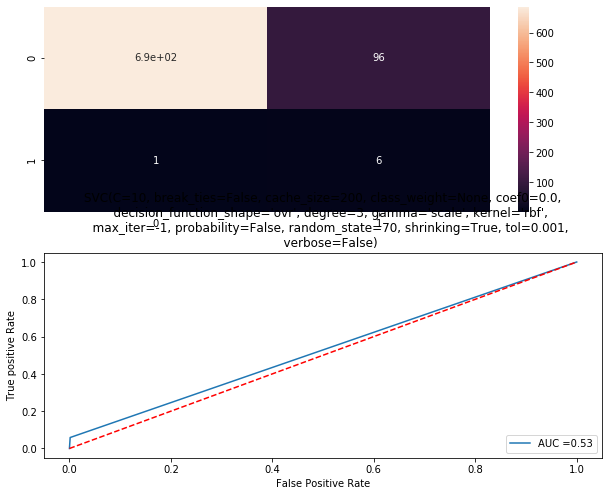

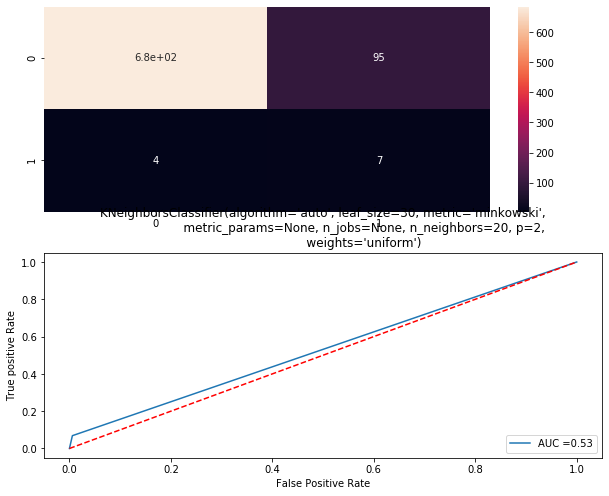

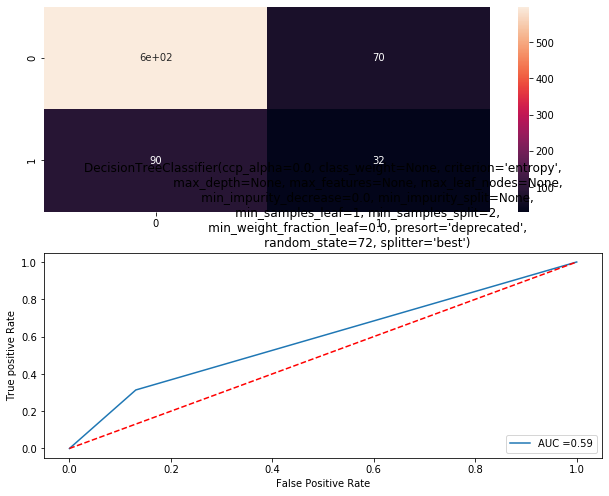

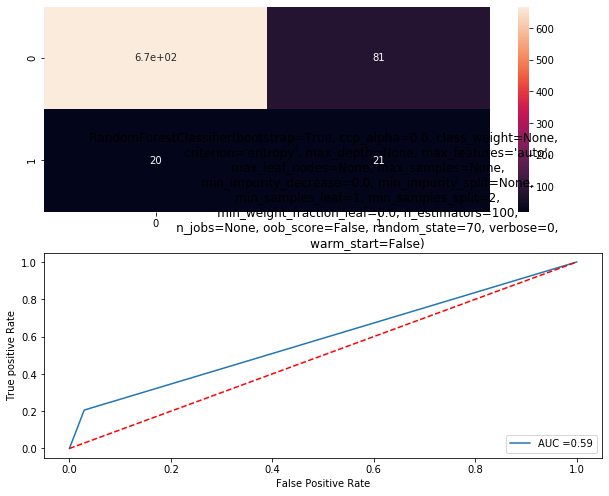

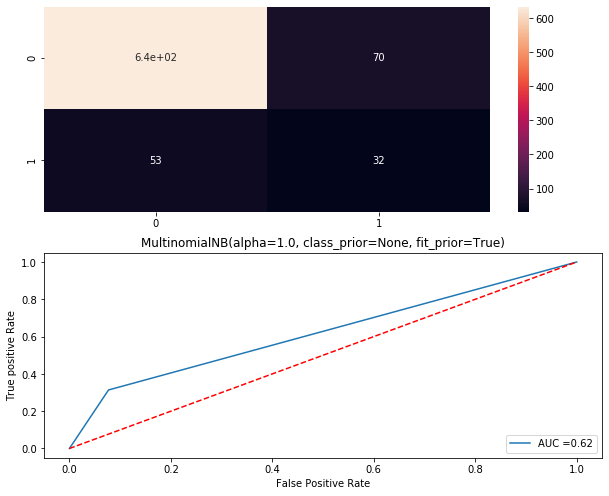

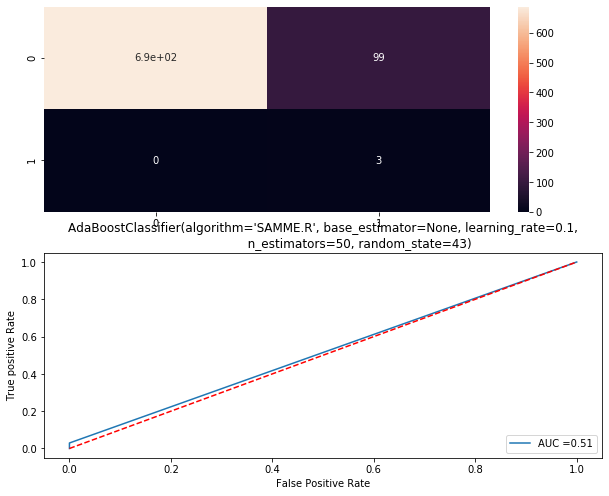

In [47]:
model=[]
score=[]
cvs=[]
rocscore=[]


for i in [SVC(C=10 ,kernel ="rbf" , random_state = 70  ),
          KNeighborsClassifier(n_neighbors=20 ) ,
          DecisionTreeClassifier(criterion ="entropy" , random_state= 49  ),
          RandomForestClassifier(criterion ="entropy" , random_state= 70 ),
          MultinomialNB( ),AdaBoostClassifier( learning_rate = 0.1, n_estimators = 50 ,random_state= 43 )]:
          
          
        k=i
        model.append(i)
        print("\n")
        print("The model calculation for" ,i,"are:" )
        k.fit(train_x,train_y)
        k.score(train_x,train_y)
        predict =k.predict(test_x)
        print(predict)
        AS=accuracy_score(predict,test_y)
        print("Accuracy Score= " ,AS)
        score.append(AS)
        cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
        print("The CV Score is"  ,cv_score)
        cvs.append(cv_score)
        print("")
        cm=confusion_matrix(predict,test_y)
        print(cm)
        print("")
        print(classification_report(predict,test_y))
        print("\n")
        false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,predict)
        roc_auc=auc(false_positive_rate,true_positive_rate)
        print("roc_auc_score" ,roc_auc)
        rocscore.append(roc_auc)
        print("\n")
        plt.figure(figsize=(10,40))
        plt.subplot(911)
        print(sns.heatmap(cm,annot=True))
        plt.subplot(912)
        plt.title(i)
        plt.plot(false_positive_rate,true_positive_rate,label="AUC =%0.2f" %roc_auc)
        plt.plot([0,1] ,[0,1] ,'r--')
        plt.legend(loc="lower right")
        plt.ylabel('True positive Rate')
        plt.xlabel("False Positive Rate")
        

# Since SVC is giving better result so  we will use it as final model.

In [54]:
sv=SVC(C=10 ,kernel ="rbf" , random_state = 70  )
sv.fit(train_x,train_y)
predict=sv.predict(test_x)
AS=accuracy_score(predict,test_y)
print("Accuracy Score=" ,AS)
cv_score=cross_val_score(sv,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score is", cv_score)

Accuracy Score= 0.8772151898734177
The CV Score is 0.858697919173445


# Saving the model

In [50]:
import joblib
joblib.dump(sv,"Agriculture_Dataset.pkl")

['Agriculture_Dataset.pkl']

# Loading Model

In [51]:
model=joblib.load('Agriculture_Dataset.pkl')

# Using Model to predict data

In [52]:
model.predict(Test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# Saving Prediction in csv file

In [53]:
dft=pd.DataFrame(predict)
dft.to_csv("Agriculture_Dataset1.csv")